### <b>Import Packages</b>

In [12]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
#sk.__version__

### <b>Import Data</b>

In [4]:
# df_h = pd.read_csv('/project_data/data_asset/Sample Heloc Data Dummy Values.csv')
# df_h.head()

In [236]:
import itc_utils.flight_service as itcfs

readClient = itcfs.get_flight_client()

nb_data_request = {'data_name': """Test_fields_100821_results.csv""", 'interaction_properties': {}}

flightInfo = itcfs.get_flight_info(readClient, nb_data_request=nb_data_request)

df1 = itcfs.read_pandas_and_concat(readClient, flightInfo)
df1.head(1)

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,DOWNNAME,TRUEFIELD,YARDSGAINED_Mean,AVG_OVER_TOGO,PLAYIDSTR,RUN_PASS,CONCEPT_8,CONCEPT_9,pred_TD,prob_TD_NO,prob_TD_YES,pred_FIRST,prob_FIRST_NO,prob_FIRST_YES
0,0,0,5,0,480,1st,35,6.36,1.272,100000020,RUN,2,0,N,0.989180609,0.010819391,N,0.562406343,0.437593657


In [208]:
df1.columns

Index(['HALF', 'DOWNNUM', 'YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWNNAME',
       'TRUEFIELD', 'YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'PLAYIDSTR',
       'RUN_PASS', 'CONCEPT_8', 'CONCEPT_9', 'pred_TD', 'prob_TD_NO',
       'prob_TD_YES', 'pred_FIRST', 'prob_FIRST_NO', 'prob_FIRST_YES'],
      dtype='object')

In [245]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


def transform_mydata(data):
    ## To drop variables from a dataframe, simply list the ones you want to keep. Can pass to a new dataframe (as here) or drop from original
    df = data
    df = pd.DataFrame(df, columns=['YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWNNAME','TRUEFIELD','RUN_PASS',
       'CONCEPT_8', 'CONCEPT_9','YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'prob_FIRST_YES','pred_FIRST'])

    ## Re-Name columns as needed by casting new column names using the .columns method. New columns names will be applied in order and must be same length as number of existing columns.
    df.columns = ['YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'DOWNNAME','TRUEFIELD','RUN_PASS',
       'CONCEPT_8', 'CONCEPT_9','YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'prob_FIRST','TARGET_1ST']

    ## Convert numeric fields to numeric so that they can be explored and used for analysis
    df[['YARDSTOGO','SCOREDIFF','TIMELEFT','TRUEFIELD','YARDSGAINED_Mean','AVG_OVER_TOGO',
       'CONCEPT_8','CONCEPT_9','prob_FIRST']] = df[['YARDSTOGO','SCOREDIFF','TIMELEFT','TRUEFIELD','YARDSGAINED_Mean','AVG_OVER_TOGO',
       'CONCEPT_8','CONCEPT_9','prob_FIRST']].apply(pd.to_numeric)

    df.TARGET_1ST = df.TARGET_1ST.replace({'N': 0,'Y': 1})

    ## Use the bins= parameter to specify the desired cut points for bins 
    df['TEE'] = pd.cut(df.YARDSTOGO, bins=[0, 3, 6, 10, 100],  labels=["SHORT","MED","LONG","XLONG"], include_lowest=True)

    ## For sample stratification, we need to add a variable to capture the fields on which we want to stratify
    df['STRAT_1ST'] = df['TEE'].astype(str) + df['DOWNNAME'].astype(str) + df['TARGET_1ST'].astype(str)
        
    df['PLAYID'] = df['RUN_PASS'] + df['CONCEPT_8'].astype(str)

    #bin_data = pd.get_dummies(df[['RUN_PASS','PLAYID','TEE','DOWNNAME']]) ## list the fields which you want to encode
    #bin_data = bin_data.drop(['RUN_PASS_PASS'], axis=1) ## where the target field is binary, first field can be dropped

    df = df.drop(['RUN_PASS','PLAYID','TEE','DOWNNAME'], axis=1) ## drop original fields
    print(df.columns)
    #df = pd.concat([df, bin_data], axis=1)
    
    return(df)

In [204]:
pd.set_option('display.max_columns', None)
df.head(1)

,YARDSTOGO,SCOREDIFF,TIMELEFT,TRUEFIELD,CONCEPT_8,CONCEPT_9,YARDSGAINED_Mean,AVG_OVER_TOGO,prob_FIRST,RUN_PASS_RUN,PLAYID_PASS4,PLAYID_PASS5,PLAYID_PASS6,PLAYID_PASS7,PLAYID_PASS8,PLAYID_PASS9,PLAYID_RUN1,PLAYID_RUN2,PLAYID_RUN3,PLAYID_RUN5,TEE_SHORT,TEE_MED,TEE_LONG,TEE_XLONG,DOWNNAME_1st,DOWNNAME_3rd
0,5,0,480,35,2,0,6.36,1.272,0.437594,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


In [205]:
len(df.columns)

26

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   HALF              10000 non-null  object
 1   DOWNNUM           10000 non-null  object
 2   YARDSTOGO         10000 non-null  object
 3   SCOREDIFF         10000 non-null  object
 4   TIMELEFT          10000 non-null  object
 5   DOWNNAME          10000 non-null  object
 6   TRUEFIELD         10000 non-null  object
 7   YARDSGAINED_Mean  10000 non-null  object
 8   AVG_OVER_TOGO     10000 non-null  object
 9   PLAYIDSTR         10000 non-null  object
 10  RUN_PASS          10000 non-null  object
 11  CONCEPT_8         10000 non-null  object
 12  CONCEPT_9         10000 non-null  object
 13  pred_TD           10000 non-null  object
 14  prob_TD_NO        10000 non-null  object
 15  prob_TD_YES       10000 non-null  object
 16  pred_FIRST        10000 non-null  object
 17  prob_FIRST_NO

In [246]:
df = transform_mydata(df1)
df.head()

Index(['YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'TRUEFIELD', 'CONCEPT_8',
       'CONCEPT_9', 'YARDSGAINED_Mean', 'AVG_OVER_TOGO', 'prob_FIRST',
       'TARGET_1ST', 'STRAT_1ST'],
      dtype='object')


,YARDSTOGO,SCOREDIFF,TIMELEFT,TRUEFIELD,CONCEPT_8,CONCEPT_9,YARDSGAINED_Mean,AVG_OVER_TOGO,prob_FIRST,TARGET_1ST,STRAT_1ST
0,5,0,480,35,2,0,6.360000,1.272000,0.437594,0,MED1st0
1,9,-7,1050,45,5,4,4.756098,0.528455,0.560704,1,LONG1st1
2,4,7,600,5,4,9,8.164835,2.041209,0.608032,1,MED3rd1
3,11,7,180,45,4,1,6.216667,0.565152,0.323197,0,XLONG1st0
4,1,0,60,45,8,5,13.416667,13.416667,0.391505,0,SHORT1st0


In [142]:
df1.shape

(10000, 19)

## <b>Data Selection for Model Build</b>

 ### Model Build

We will build 2 models to predict First Down, one using Logistic Regression and one with Cross-Validation.

#### Data Preparation is complete. Step 1 is Sample Splitting 

First we will save a validation sample for testing the batch deployment

In [247]:
model_df = df.sample(frac=0.8, random_state=100)
#valid_df = df[~df.index.isin(model_df.index)]
print(len(model_df)) #,len(valid_df))

8000


Working with First Down predictions, we split the data, stratifying on selected data fields, always including y </br>
If desired, we can use the substitute scaled data for raw input variables. They have already been transformed into the appropriate array. 

In [248]:
from sklearn.model_selection import train_test_split

## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X = model_df.drop(columns = ['TARGET_1ST','STRAT_1ST'], axis = 1) ## We are using the same input variables, so the same scaled data will work. Only change is the target and stratification variables.
y = model_df['TARGET_1ST'].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify = model_df.STRAT_1ST, random_state=121)

In [267]:
X.head(1)

,YARDSTOGO,SCOREDIFF,TIMELEFT,TRUEFIELD,CONCEPT_8,CONCEPT_9,YARDSGAINED_Mean,AVG_OVER_TOGO,prob_FIRST
8018,7,-7,1140,35,7,1,10.717391,1.531056,0.598261


### Based on our findings, we decide to build the CV regression model

In [250]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegressionCV

# fit the model with data using the default parameters
cv_logr = LogisticRegressionCV(cv=7, random_state=0).fit(X, y)
#cv_logr.get_params()
#cv_logr.score(test_X, test_y)

In [252]:
cv_pred = cv_logr.predict(test_X)

report = sk.metrics.classification_report(test_y, cv_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       607
           1       0.99      1.00      0.99       993

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



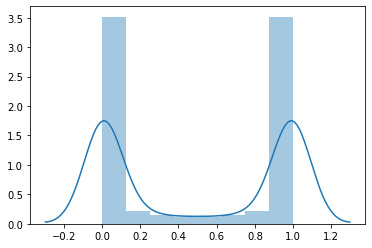

In [253]:
cv_probs = cv_logr.predict_proba(test_X)
cv_probs

sns.distplot(cv_probs, kde=True, hist=True)

### ROC Curve for Logistic Regression model

## Publish the Model by Storing in the Deployment Space

In [254]:
import os
from ibm_watson_machine_learning import APIClient

wml_credentials = { "url" : os.environ['RUNTIME_ENV_APSX_URL'],        
                    "token": os.environ['USER_ACCESS_TOKEN'],
                    "instance_id" : "openshift", 
                    "version": "4.0"
        }

wml_client = APIClient(wml_credentials)
    
type(wml_client), wml_client.version

(ibm_watson_machine_learning.client.APIClient, '1.0.173')

In [255]:
from ibm_watson_machine_learning import APIClient

client = APIClient(wml_credentials)

In [256]:
# specify the software specification for the model
sw_spec_id = wml_client.software_specifications.get_id_by_name('default_py3.7_opence')
sw_spec_id

'c2057dd4-f42c-5f77-a02f-72bdbd3282c9'

In [257]:
# Connect to current WStudio project
wml_client.set.default_project(os.environ['PROJECT_ID'])
# should return 'SUCCESS'

'SUCCESS'

In [29]:
#wml_client.spaces.list(limit=100)

In [258]:
space_id = 'e02d8142-d472-4b2f-bd48-34d1f278f5bc'
space_id

'e02d8142-d472-4b2f-bd48-34d1f278f5bc'

In [259]:
wml_client.set.default_space(space_id)

Unsetting the project_id ...


'SUCCESS'

In [260]:
metadata = {
    wml_client.repository.ModelMetaNames.NAME: 'Cross_Val_Model',
    wml_client.repository.ModelMetaNames.TYPE: "scikit-learn_0.23",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sw_spec_id
}

model_info = wml_client.repository.store_model(cv_logr,
                                               meta_props=metadata,
                                               training_data=train_X,
                                               feature_names=X.columns,
                                               training_target=train_y)

model_id = wml_client.repository.get_model_uid(model_info)
model_info,
model_id

'bb9bb767-cf3e-4154-8749-e077502fc4e1'

In [261]:
import json

print(json.dumps(model_info, indent=2))

{
  "entity": {
    "label_column": "l1",
    "software_spec": {
      "id": "c2057dd4-f42c-5f77-a02f-72bdbd3282c9",
      "name": "default_py3.7_opence"
    },
    "training_data_references": [
      {
        "connection": {
          "access_key_id": "not_applicable",
          "endpoint_url": "not_applicable",
          "secret_access_key": "not_applicable"
        },
        "id": "1",
        "location": {},
        "schema": {
          "fields": [
            {
              "name": "YARDSTOGO",
              "type": "int64"
            },
            {
              "name": "SCOREDIFF",
              "type": "int64"
            },
            {
              "name": "TIMELEFT",
              "type": "int64"
            },
            {
              "name": "TRUEFIELD",
              "type": "int64"
            },
            {
              "name": "CONCEPT_8",
              "type": "int64"
            },
            {
              "name": "CONCEPT_9",
              "type": 

In [283]:
wml_client.repository.list_models()

------------------------------------  ----------------  ------------------------  -----------------
ID                                    NAME              CREATED                   TYPE
bb9bb767-cf3e-4154-8749-e077502fc4e1  Cross_Val_Model   2022-02-10T14:29:15.002Z  scikit-learn_0.23
de5e0649-73ce-4aef-b028-bacff5d5847e  FIRST_DOWN_MODEL  2022-01-14T15:14:48.002Z  scikit-learn_0.23
------------------------------------  ----------------  ------------------------  -----------------


In [263]:
loaded_model = wml_client.repository.load(model_id)

In [264]:
print(type(loaded_model))

<class 'sklearn.linear_model._logistic.LogisticRegressionCV'>


#### Now deploy the model so we can test payload return. For a single item test, we use a synchronous deployment

In [ ]:
## We can skip this and next step if creating the model deployment from the UI

# metadata = {
#     wml_client.deployments.ConfigurationMetaNames.NAME: "Deployment of scikit model",
#     wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
# }
# created_deployment = wml_client.deployments.create(model_id, meta_props=metadata)

In [272]:
## Here, the deployment was created in the Deployment Space GUI, saving steps above and below

deployment_uid = 'c612e050-ef00-4a07-9604-15d8b2bc8773'

In [ ]:
## The endpoint URL is also available in the deployment space UI

# scoring_endpoint = wml_client.deployments.get_scoring_href(created_deployment)
# print(scoring_endpoint)

#### Create a single record payload. This can be used for testing here in the notebook or pasted into the UI as part of integration testing

In [273]:
payload = { "input_data": [{ "fields":["YARDSTOGO", "SCOREDIFF", "TIMELEFT", "TRUEFIELD", "CONCEPT_8",
"CONCEPT_9", "YARDSGAINED_Mean", "AVG_OVER_TOGO", "prob_FIRST"],
 "values": [[7,-7,1140,35,7,1,10.717391,1.531056,0.59826]]}]}

In [274]:
predictions = wml_client.deployments.score(deployment_uid, payload)

In [275]:
print(json.dumps(predictions, indent=2))

{
  "predictions": [
    {
      "fields": [
        "prediction",
        "probability"
      ],
      "values": [
        [
          1,
          [
            0.002662501745594348,
            0.9973374982544057
          ]
        ]
      ]
    }
  ]
}


## Export Data back to project space

In [276]:
#model_df = df.sample(frac=0.8, random_state=100)
valid_df = df1[~df1.index.isin(model_df.index)]
print(len(model_df),len(valid_df))
#df1

8000 2000


In [277]:
from ibm_watson_studio_lib import access_project_or_space
wslib = access_project_or_space()
wslib.save_data("validation_data.csv", valid_df.to_csv(index=False).encode(),overwrite=True)

{'name': 'validation_data.csv',
 'asset_type': 'data_asset',
 'asset_id': 'data_asset.validationdatacsv',
 'attachment_id': '6b948fde-1524-4213-96eb-18602e4b80bb',
 'filepath': 'data_asset/validation_data.csv',
 'data_size': 214390,
 'mime': 'text/csv',
 'summary': ['looked up asset', 'selected attachment', 'overwritten file']}

### Re-import saved data and view it

In [278]:
import itc_utils.flight_service as itcfs

readClient = itcfs.get_flight_client()

nb_data_request = {'data_name': """validation_data.csv""", 'interaction_properties': {}}

flightInfo = itcfs.get_flight_info(readClient, nb_data_request=nb_data_request)

df_val = itcfs.read_pandas_and_concat(readClient, flightInfo)
print(df_val.shape)
df_val.head()

(2000, 19)


,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,DOWNNAME,TRUEFIELD,YARDSGAINED_Mean,AVG_OVER_TOGO,PLAYIDSTR,RUN_PASS,CONCEPT_8,CONCEPT_9,pred_TD,prob_TD_NO,prob_TD_YES,pred_FIRST,prob_FIRST_NO,prob_FIRST_YES
0,0,2,4,7,600,3rd,5,8.164835,2.04120875,200000049,PASS,4,9,N,0.929719852,0.070280148,Y,0.391968242,0.608031758
1,0,2,1,7,1140,3rd,5,13.16,13.16,200000062,PASS,6,2,N,0.918811506,0.081188494,Y,0.197842735,0.802157265
2,0,2,7,7,60,3rd,45,5.62,0.802857143,100000031,RUN,3,1,N,0.999992873,7.13E-06,N,0.546142512,0.453857488
3,0,0,3,-7,975,1st,5,11.895105,3.965035,200000083,PASS,8,3,Y,0.435497017,0.564502983,Y,0.499266757,0.500733243
4,0,2,4,7,600,3rd,5,5.62,1.405,100000010,RUN,1,0,N,0.621614407,0.378385593,Y,0.455149394,0.544850606


In [307]:
def model_batch_score():

    import pandas as pd
    import numpy as np
    import sklearn as sk
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import OneHotEncoder

    # Load model from the deployment space
    from ibm_watson_machine_learning import APIClient
    import os

    wml_credentials = { "url" : os.environ['RUNTIME_ENV_APSX_URL'],        
                    "token": os.environ['USER_ACCESS_TOKEN'],
                    "instance_id" : "openshift", 
                    "version": "4.0"
        }

    wml_client_fn = APIClient(wml_credentials)
    
    #Space ID taken by pre-running cells above
    space_id_fn = 'e02d8142-d472-4b2f-bd48-34d1f278f5bc'
    wml_client_fn.set.default_space(space_id_fn)

    # Load model from the deployment space
    model_obj = wml_client_fn.repository.load('bb9bb767-cf3e-4154-8749-e077502fc4e1')


    def transform_mydata(data):    
        ## To drop variables from a dataframe, simply list the ones you want to keep. Can pass to a new dataframe (as here) or drop from original
        df = data
        df = pd.DataFrame(data, columns=["HALF", "DOWNNUM", "YARDSTOGO", "SCOREDIFF", "TIMELEFT", "DOWNNAME",
       "TRUEFIELD", "YARDSGAINED_Mean", "AVG_OVER_TOGO", "PLAYIDSTR","RUN_PASS", "CONCEPT_8", "CONCEPT_9", "pred_TD", "prob_TD_NO",
       "prob_TD_YES", "pred_FIRST", "prob_FIRST_NO", "prob_FIRST_YES"])
    
        df = df.drop(columns = ["HALF", "DOWNNUM", "PLAYIDSTR","pred_TD","prob_TD_NO","prob_TD_YES","prob_FIRST_NO"])

        ## Re-Name columns as needed by casting new column names using the .columns method. New columns names will be applied in order and must be same length as number of existing columns.
        df.columns = ['YARDSTOGO','SCOREDIFF','TIMELEFT','DOWNNAME','TRUEFIELD','YARDSGAINED_Mean','AVG_OVER_TOGO','RUN_PASS','CONCEPT_8','CONCEPT_9','TARGET_1ST','prob_FIRST']

        ## Convert numeric fields to numeric so that they can be explored and used for analysis
        df[['YARDSTOGO','SCOREDIFF','TIMELEFT','TRUEFIELD','YARDSGAINED_Mean','AVG_OVER_TOGO',
       'CONCEPT_8','CONCEPT_9','prob_FIRST']] = df[['YARDSTOGO','SCOREDIFF','TIMELEFT','TRUEFIELD','YARDSGAINED_Mean','AVG_OVER_TOGO',
       'CONCEPT_8','CONCEPT_9','prob_FIRST']].apply(pd.to_numeric)

        df.TARGET_1ST = df.TARGET_1ST.replace({'N': 0,'Y': 1})

        ## Use the bins= parameter to specify the desired cut points for bins 
        df['TEE'] = pd.cut(df.YARDSTOGO, bins=[0, 3, 6, 10, 100],  labels=["SHORT","MED","LONG","XLONG"], include_lowest=True)

        ## For sample stratification, we need to add a variable to capture the fields on which we want to stratify
        df['STRAT_1ST'] = df['TEE'].astype(str) + df['DOWNNAME'].astype(str) + df['TARGET_1ST'].astype(str)
        
        df['PLAYID'] = df['RUN_PASS'] + df['CONCEPT_8'].astype(str)

        #bin_data = pd.get_dummies(df[['RUN_PASS','PLAYID','TEE','DOWNNAME']]) ## list the fields which you want to encode
        #bin_data = bin_data.drop(['RUN_PASS_PASS'], axis=1) ## where the target field is binary, first field can be dropped

        df = df.drop(['RUN_PASS','PLAYID','TEE','DOWNNAME','TARGET_1ST','STRAT_1ST'], axis=1) ## drop original fields
        #df = pd.concat([df, bin_data], axis=1)
    
        return(df)


    def score(df):

            #Set cleitn to the function space identified above
            wml_client_fn.set.default_space('e02d8142-d472-4b2f-bd48-34d1f278f5bc')

            outputs =[]

            list_of_records = df.get("input_data")[0].get("values")

            new_records = transform_mydata(list_of_records)
        
            #records = list_of_records[0]

            scored = model_obj.predict(new_records)
            probs = model_obj.predict_proba(new_records)
            payload_output= {"predictions": [{"values": [scored.tolist(),probs.tolist()]}]}

            return payload_output

    return score


In [280]:
 payload_batch = { "input_data": [{ "fields":[ "HALF", "DOWNNUM", "YARDSTOGO", "SCOREDIFF", "TIMELEFT", "DOWNNAME","TRUEFIELD", "YARDSGAINED_Mean", "AVG_OVER_TOGO", "PLAYIDSTR","RUN_PASS", "CONCEPT_8", "CONCEPT_9", "pred_TD", "prob_TD_NO",
       "prob_TD_YES", "pred_FIRST", "prob_FIRST_NO", "prob_FIRST_YES"],
 "values": [[0,0,5,0,480,"1st",35,6.36,1.272,100000020,"RUN",2,0,"N",0.989180609,0.010819391,"N",0.562406343,0.437593657]]}]}                                                                          

In [286]:
data = payload_batch.get("input_data")[0].get("values")

In [ ]:
transform_mydata(data)

In [308]:
model_batch_score()(payload_batch)

{'predictions': [{'values': [[0],
    [[0.9457548735113317, 0.05424512648866827]]]}]}

In [305]:
my_pred = model_batch_score()(payload_batch)
my_preditions = my_pred["predictions"]
my_preditions

Index(['YARDSTOGO', 'SCOREDIFF', 'TIMELEFT', 'TRUEFIELD', 'YARDSGAINED_Mean',
       'AVG_OVER_TOGO', 'CONCEPT_8', 'CONCEPT_9', 'prob_FIRST'],
      dtype='object')
   YARDSTOGO  SCOREDIFF  TIMELEFT  TRUEFIELD  YARDSGAINED_Mean  AVG_OVER_TOGO  \
0  5          0          480       35         6.36              1.272           

   CONCEPT_8  CONCEPT_9  prob_FIRST  
0  2          0          0.437594    
testmyfoot


[{'values': [[0], [[0.9457548735113317, 0.05424512648866827]]]}]

## Deploy Function to the Space

In [310]:
meta_data = {
    wml_client.repository.FunctionMetaNames.NAME: 'model_batch_score',
    wml_client.repository.FunctionMetaNames.DESCRIPTION: 'model_batch_score',
    wml_client.repository.FunctionMetaNames.SOFTWARE_SPEC_UID: sw_spec_id
}

function_details = wml_client.repository.store_function(meta_props=meta_data, function=model_batch_score)

In [311]:
function_uid = wml_client.repository.get_function_uid(function_details)
print(function_uid)

ff852586-0e98-43f0-94e6-cfe9e82c0044
